# Q-Q Plot Examples: Understanding Distribution Shapes

## What is a Q-Q Plot?

A **Q-Q (Quantile-Quantile) Plot** is a graphical tool used to assess whether a dataset follows a particular theoretical distribution, typically the **normal (Gaussian) distribution**.

### How It Works:
1. **Theoretical Quantiles (X-axis)**: Expected values if the data were perfectly normal
2. **Sample Quantiles (Y-axis)**: Actual values from your dataset
3. **Reference Line (Red)**: The 45-degree line representing perfect normality

**Key Principle**: If your data is normally distributed, the points will fall approximately along the red reference line.

### Why Q-Q Plots Matter:
- Many statistical tests assume normality (t-tests, ANOVA, linear regression)
- Identifies distribution violations quickly
- Reveals specific types of deviations (skewness, heavy tails, outliers)
- More informative than histograms for distribution assessment

---

## Interpreting Q-Q Plot Shapes

This notebook demonstrates **5 common patterns** and what they reveal about your data:

## Pattern Guide: What Each Shape Means

### 1️⃣ **Straight Line (Normal Distribution)**
- **Shape**: Points fall along the red line
- **Meaning**: Data is normally distributed ✓
- **Action**: Proceed with parametric tests confidently

---

### 2️⃣ **Upward Curve (Right/Positive Skew)**
- **Shape**: Points curve **upward** (convex) at the right end
- **Meaning**: Long tail on the right; most values are small with a few very large ones
- **Examples**: Income, home prices, exponential decay times
- **Action**: Consider log transformation or non-parametric tests

---

### 3️⃣ **Downward Curve (Left/Negative Skew)**
- **Shape**: Points curve **downward** (concave) at the left end
- **Meaning**: Long tail on the left; most values are large with a few very small ones
- **Examples**: Age at death, test scores near ceiling
- **Action**: Consider reflection + log transformation

---

### 4️⃣ **S-Shape (Heavy/Fat Tails)**
- **Shape**: Points deviate **away from line** at **both ends** (steep S)
- **Meaning**: More extreme values than normal distribution predicts
- **Examples**: Financial returns, stock prices, Student's t-distribution
- **Impact**: Underestimates risk of extreme events
- **Action**: Use robust methods or distributions with heavier tails (t-distribution)

---

### 5️⃣ **Flipped S-Shape (Light/Thin Tails)**
- **Shape**: Points deviate **toward line** at **both ends** (flat S)
- **Meaning**: Fewer extreme values than normal distribution predicts
- **Examples**: Uniform distribution, bounded data
- **Impact**: Overestimates risk of extreme events
- **Action**: May indicate artificial bounds or data truncation

---

## Quick Reference Table

| Pattern | Left Tail | Right Tail | Distribution Type | Transformation |
|---------|-----------|------------|-------------------|----------------|
| **Straight** | On line | On line | Normal | None needed |
| **Right Skew** | On/below line | Above line (curves up) | Positive skew | `log(x)` or `sqrt(x)` |
| **Left Skew** | Below line (curves down) | On/above line | Negative skew | `log(max - x)` |
| **Heavy Tails** | Below line | Above line | Leptokurtic | Robust methods |
| **Light Tails** | Above line | Below line | Platykurtic | None usually |

---

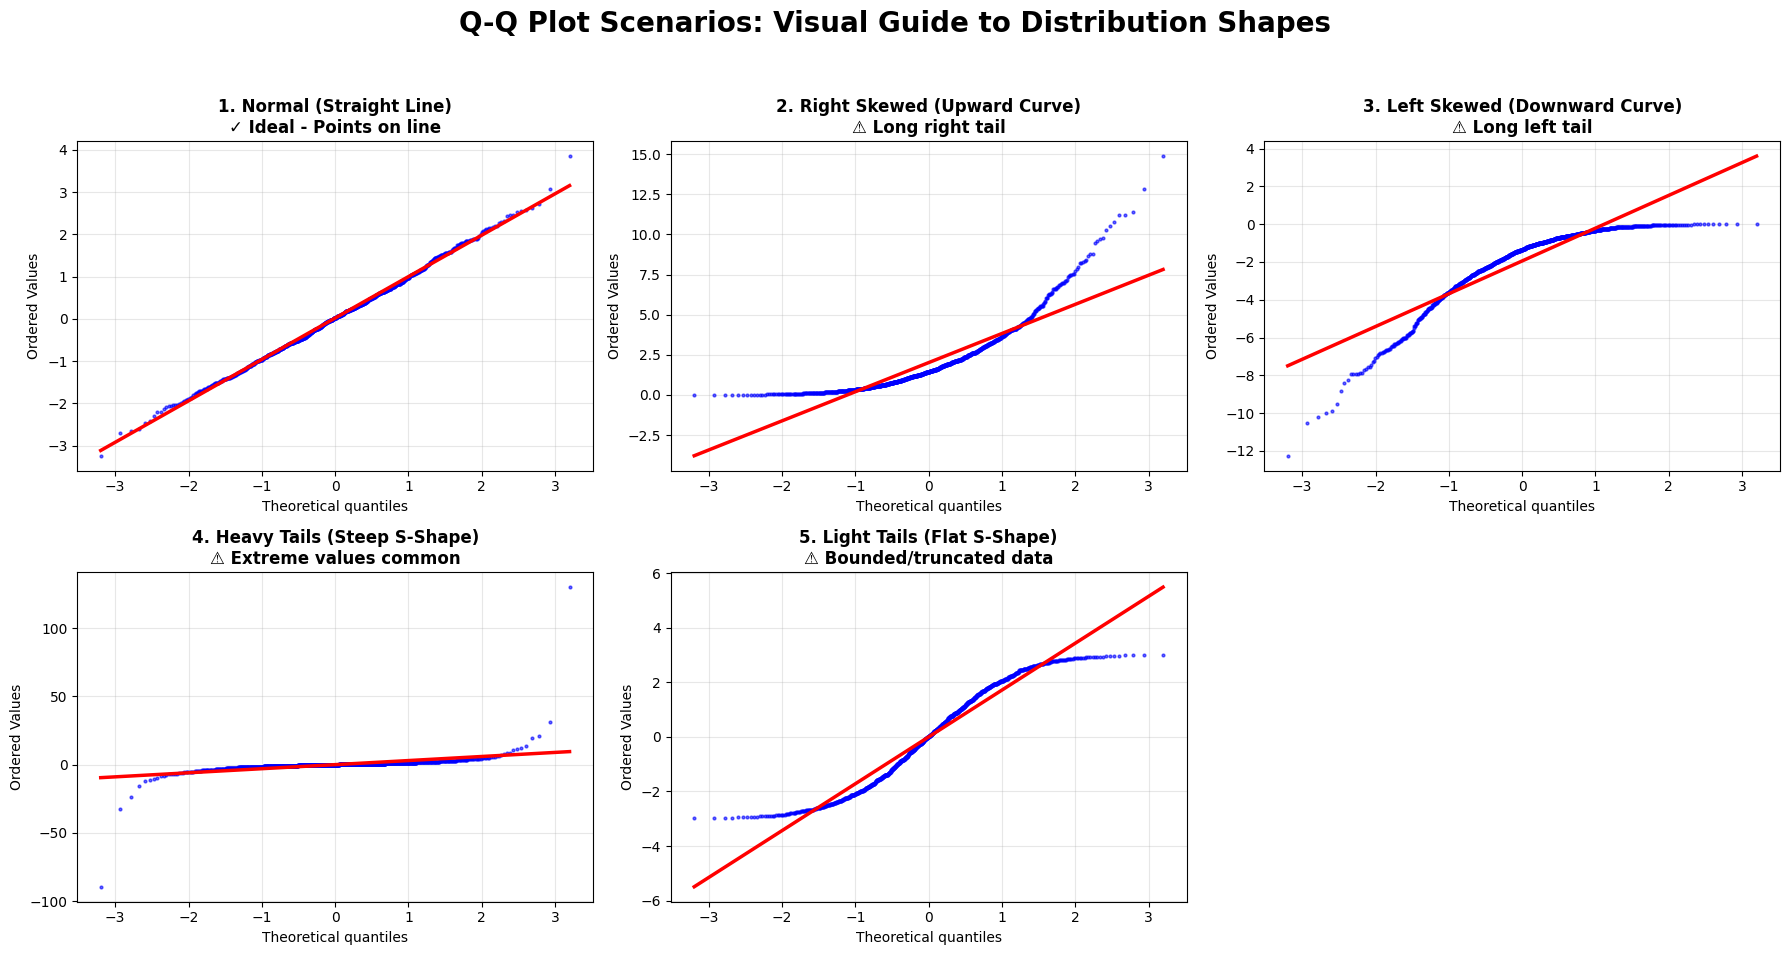


SUMMARY STATISTICS: Comparing Distribution Characteristics
Distribution               Mean    Std Dev   Skewness   Kurtosis
----------------------------------------------------------------------
Normal                     0.02       0.98       0.12       0.07
Right Skewed               2.02       2.00       1.98       5.38
Left Skewed               -1.95       1.89      -1.64       3.00
Heavy Tails                0.02       5.74       7.82     322.15
Light Tails               -0.00       1.75       0.01      -1.23
----------------------------------------------------------------------
Interpretation:
  • Skewness ≈ 0: Symmetric | > 0: Right skew | < 0: Left skew
  • Kurtosis ≈ 0: Normal tails | > 0: Heavy tails | < 0: Light tails


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set seed for reproducibility
np.random.seed(42)
n_samples = 1000

# =============================================================================
# Generate Data for Each Distribution Scenario
# =============================================================================

# 1. NORMAL DISTRIBUTION (The Ideal Case)
# -----------------------------------------
# Data follows the normal distribution perfectly.
# Q-Q Plot: Points fall along the red reference line (straight line).
# Interpretation: This is what we hope to see when checking normality assumptions.
data_normal = np.random.normal(loc=0, scale=1, size=n_samples)

# 2. RIGHT SKEWED (Positive Skew)
# ---------------------------------
# Most values are small, with a long tail of large values.
# Example: Income distribution, house prices, exponential decay times.
# Q-Q Plot: Points curve UPWARD (convex) - right tail extends above the line.
# Interpretation: More large values than expected in a normal distribution.
data_right_skew = np.random.exponential(scale=2, size=n_samples)

# 3. LEFT SKEWED (Negative Skew)
# --------------------------------
# Most values are large, with a long tail of small values.
# Example: Age at death, test scores near maximum, failure times with early failures.
# Q-Q Plot: Points curve DOWNWARD (concave) - left tail extends below the line.
# Interpretation: More small values than expected in a normal distribution.
data_left_skew = -np.random.exponential(scale=2, size=n_samples)

# 4. HEAVY TAILS (Fat Tails / Leptokurtic)
# ------------------------------------------
# More extreme values (both high and low) than a normal distribution.
# Example: Stock market returns, financial risk, Student's t-distribution.
# Q-Q Plot: S-SHAPE - points deviate AWAY from the line at BOTH ends.
# Interpretation: Higher risk of extreme events than normal distribution predicts.
# Impact: Underestimates tail risk - dangerous in finance and risk management!
data_heavy_tail = np.random.standard_t(df=2, size=n_samples)

# 5. LIGHT TAILS (Thin Tails / Platykurtic)
# -------------------------------------------
# Fewer extreme values than a normal distribution.
# Example: Uniform distribution, bounded/truncated data.
# Q-Q Plot: FLIPPED S-SHAPE - points deviate TOWARD the line at both ends.
# Interpretation: More constrained than normal; may indicate artificial bounds.
# Impact: Overestimates tail risk - less variability than expected.
data_light_tail = np.random.uniform(low=-3, high=3, size=n_samples)

# =============================================================================
# Create Q-Q Plots for All Scenarios
# =============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Q-Q Plot Scenarios: Visual Guide to Distribution Shapes', fontsize=20, fontweight='bold')

# Helper function to create standardized Q-Q plots
def create_qq_plot(data, ax, title):
    """
    Creates a Q-Q plot comparing sample data to theoretical normal distribution.
    
    Parameters:
    - data: Array of sample values
    - ax: Matplotlib axis object
    - title: Plot title describing the distribution type
    """
    stats.probplot(data, dist="norm", plot=ax)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.get_lines()[0].set_markersize(2.0)  # Blue dots (sample quantiles)
    ax.get_lines()[0].set_alpha(0.6)       # Transparency for overlapping points
    ax.get_lines()[1].set_linewidth(2.5)   # Red reference line (theoretical normal)
    ax.grid(True, alpha=0.3)               # Add grid for easier reading

# Generate all 5 Q-Q plots
create_qq_plot(data_normal, axes[0, 0], "1. Normal (Straight Line)\n✓ Ideal - Points on line")
create_qq_plot(data_right_skew, axes[0, 1], "2. Right Skewed (Upward Curve)\n⚠ Long right tail")
create_qq_plot(data_left_skew, axes[0, 2], "3. Left Skewed (Downward Curve)\n⚠ Long left tail")
create_qq_plot(data_heavy_tail, axes[1, 0], "4. Heavy Tails (Steep S-Shape)\n⚠ Extreme values common")
create_qq_plot(data_light_tail, axes[1, 1], "5. Light Tails (Flat S-Shape)\n⚠ Bounded/truncated data")

# Remove the empty 6th subplot frame
fig.delaxes(axes[1, 2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# =============================================================================
# Summary Statistics for Comparison
# =============================================================================
print("\n" + "="*70)
print("SUMMARY STATISTICS: Comparing Distribution Characteristics")
print("="*70)

datasets = [
    ("Normal", data_normal),
    ("Right Skewed", data_right_skew),
    ("Left Skewed", data_left_skew),
    ("Heavy Tails", data_heavy_tail),
    ("Light Tails", data_light_tail)
]

print(f"{'Distribution':<20} {'Mean':>10} {'Std Dev':>10} {'Skewness':>10} {'Kurtosis':>10}")
print("-"*70)

for name, data in datasets:
    mean = np.mean(data)
    std = np.std(data)
    skew = stats.skew(data)
    kurt = stats.kurtosis(data)
    print(f"{name:<20} {mean:>10.2f} {std:>10.2f} {skew:>10.2f} {kurt:>10.2f}")

print("-"*70)
print("Interpretation:")
print("  • Skewness ≈ 0: Symmetric | > 0: Right skew | < 0: Left skew")
print("  • Kurtosis ≈ 0: Normal tails | > 0: Heavy tails | < 0: Light tails")
print("="*70)